In [5]:
import sklearn
from sklearn.tree import LinearDecisionTreeRegressor as ldtr
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [6]:
from sklearn.datasets import load_boston
boston=load_boston()

In [7]:
df= pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
#Adding the feature names to the dataframe
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df['PRICE']=boston.target

In [10]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [14]:
X = np.array(df.drop(['PRICE'], axis=1))
X = X[:, [5, 10, 12]]
# print(X.shape)
y = np.array(df['PRICE'])
indices = y < 50
y= y[indices]
X= X[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(506, 13)


In [12]:
# X = data.drop(['charges','age','children','region', 'sex'],axis = 1)
# y = data.charges
# X = np.array(X)
# y = np.array(y)

In [13]:
print(type(X_train))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(404, 13)
(102, 13)
(404,)
(102,)


In [78]:
reg1 = ldtr(max_depth= 1)
reg2 = LinearRegression(n_jobs = -1)
reg3 = LinearSVR()
reg4 = SVR(kernel = 'rbf')
reg5 = DecisionTreeRegressor(max_depth = 1, min_samples_leaf= 3, min_samples_split= 6)
reg6 = Lasso()
reg7 = RandomForestRegressor(max_depth = 1,n_jobs = -1)

In [79]:
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)
reg6.fit(X_train, y_train)
reg7.fit(X_train, y_train)

B:\Research\Decision Tree Regressor Combined with Linear Regressor\code\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomForestRegressor(max_depth=1, n_jobs=-1)

In [80]:
reg2.coef_

array([ 3.96544584, -0.94094359, -0.51778938])

In [81]:
y_pred1 = reg1.predict(X_test)
y_pred2 = reg2.predict(X_test)
y_pred3 = reg3.predict(X_test)
y_pred4 = reg4.predict(X_test)
y_pred5 = reg5.predict(X_test)
y_pred6 = reg6.predict(X_test)
y_pred7 = reg7.predict(X_test)

In [82]:
print('Root Mean squared error: %.2f'% np.sqrt(mean_squared_error(y_test, y_pred1)))
print('Root Mean squared error: %.2f'% np.sqrt(mean_squared_error(y_test, y_pred2)))
print('Root Mean squared error: %.2f'% np.sqrt(mean_squared_error(y_test, y_pred3)))
print('Root Mean squared error: %.2f'% np.sqrt(mean_squared_error(y_test, y_pred4)))
print('Root Mean squared error: %.2f'% np.sqrt(mean_squared_error(y_test, y_pred5)))
print('Root Mean squared error: %.2f'% np.sqrt(mean_squared_error(y_test, y_pred6)))
print('Root Mean squared error: %.2f'% np.sqrt(mean_squared_error(y_test, y_pred7)))

Root Mean squared error: 3.61
Root Mean squared error: 4.08
Root Mean squared error: 4.29
Root Mean squared error: 4.09
Root Mean squared error: 6.26
Root Mean squared error: 4.33
Root Mean squared error: 5.41


In [83]:
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_test, y_pred1))
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_test, y_pred2))
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_test, y_pred3))
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_test, y_pred4))
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_test, y_pred5))
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_test, y_pred6))
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_test, y_pred7))

Mean Absolute Error: 2.73
Mean Absolute Error: 3.11
Mean Absolute Error: 3.28
Mean Absolute Error: 3.03
Mean Absolute Error: 4.49
Mean Absolute Error: 3.35
Mean Absolute Error: 3.68


In [84]:
def regression_model(model):
    regressor = model
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    return rmse,mae


model_performance = pd.DataFrame(columns = ["Model","RMSE","MAE"])
model_to_evaluate = [ldtr(max_depth= 1),
                     LinearRegression(n_jobs = -1),
                     SVR(kernel = 'rbf'),
                     DecisionTreeRegressor(max_depth = 1, min_samples_leaf= 3, min_samples_split= 6),
                     Lasso(),
                    RandomForestRegressor(max_depth = 1,n_jobs = -1)]

for model in model_to_evaluate:
    rmse,mae = regression_model(model)
    model_performance = model_performance.append({"Model" : model,"RMSE" : rmse,"MAE": mae},ignore_index = True)

In [85]:
model_performance

,Model,RMSE,MAE
0,LinearDecisionTreeRegressor(max_depth=1),3.610070,2.725179
1,LinearRegression(n_jobs=-1),4.080212,3.106633
2,SVR(),4.091056,3.026106
3,"DecisionTreeRegressor(max_depth=1, min_samples...",6.257049,4.488417
4,Lasso(),4.325520,3.348883
5,"(DecisionTreeRegressor(max_depth=1, max_featur...",5.097305,3.422840


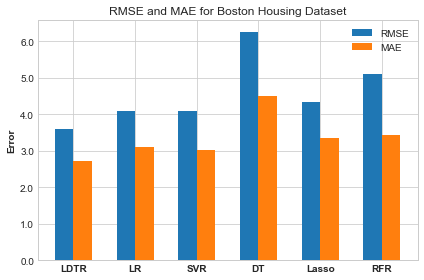

In [86]:
labels = ['LDTR','LR','SVR','DT','Lasso','RFR']

x = (np.arange(len(labels)))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, model_performance['RMSE'], width, label='RMSE')
rects2 = ax.bar(x + width/2, model_performance['MAE'], width, label='MAE')
# rects1[0].set_color('#097054')
# rects2[0].set_color('#FFDE00')

ax.set_ylabel('Error',fontweight = 'bold')
ax.set_title('RMSE and MAE for Boston Housing Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels,fontweight = 'bold')
# ax.set_yticklabels([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0])
# ax.set_ylim([0.0,8.0])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.legend()


fig.tight_layout()
# plt.savefig('B:/boston.png')
plt.show()

In [ ]:
for i in range(X_train.shape[1]):
    plt.scatter(X_train[:, i], y_train,  color='black')
    plt.scatter(X_train[:, i], reg1.predict(X_train),  color='blue')
    plt.scatter(X_train[:, i], reg2.predict(X_train),  color='green')
    plt.show()